<a href="https://colab.research.google.com/github/Ste881/Forecasting-Gold-Price/blob/main/Forecasting_Gold_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

Importing Libraries

In [2]:
import numpy as np #for making arrays
import pandas as pd #for making structured table
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
from sklearn.model_selection import train_test_split #for splitting the data into training and testing data
from sklearn.ensemble import RandomForestRegressor #for training the model
from sklearn import metrics #for finding the accuracy of the model

# Data Exploration and Understanding

Data collection and processing

In [3]:
#loading csv data to Pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
#viewing the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# Data Preprocessing

In [8]:
#checking the number of missing values - No null values found
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# Exclude non-numeric columns [in this case it's date]
numeric_gold_data = gold_data.drop(columns= 'Date')

# Calculate the correlation matrix
correlation = numeric_gold_data.corr()

In [11]:
#printing correlation values
correlation = numeric_gold_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

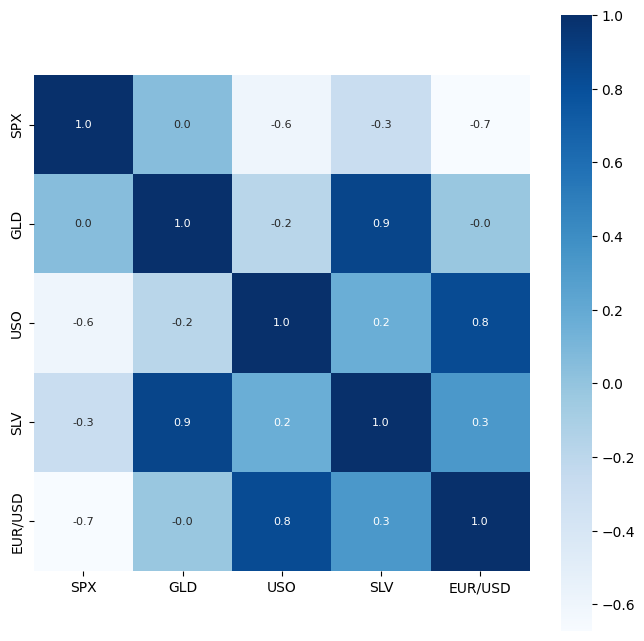

In [12]:
#creating heatmap to visualise correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
#correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

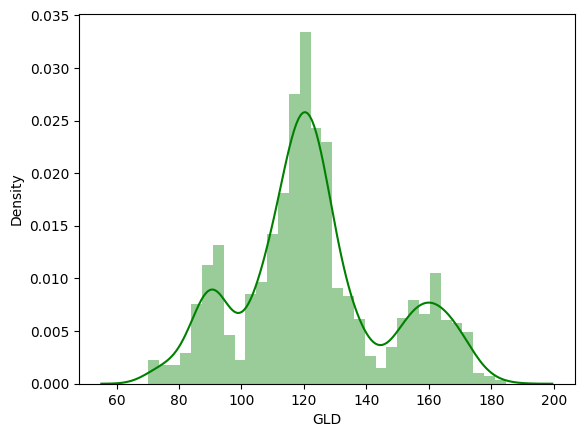

In [16]:
# check the distribution of the GLD price
import warnings
warnings.filterwarnings("ignore")
sns.distplot(gold_data['GLD'], color = 'green')

In [17]:
#Splitting the features and target
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
# Splitting Training Data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Feature Engineering and Model Development

In [23]:
#Model Training : Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [25]:
# Model Evaluation: prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.65579914  82.15819975 115.90520062 127.67080076 120.91690119
 154.83669798 150.49919882 126.30220026 117.47059854 126.0157006
 116.75090101 171.63510053 141.73009893 167.91799962 115.16950031
 117.60170021 138.28010316 170.24400148 159.53610284 158.89209997
 155.1508001  125.04859949 175.54569941 157.12810365 125.24320049
  93.71969979  77.93910009 120.58430024 119.11559916 167.46160017
  88.17890017 125.38540026  91.01030052 117.59850049 121.1184988
 136.49880121 115.29640131 115.18690063 147.61249968 107.0680012
 104.64560268  87.13579825 126.43970075 118.23890008 153.93129882
 119.42410035 108.38479988 108.17699854  93.13380028 127.06429772
  74.72310015 113.49709913 121.19750021 111.41849958 118.76949877
 120.68779929 160.35299996 167.93500149 147.0788966   85.85019882
  94.5370005   86.91479888  90.67820003 119.0370006  126.5258007
 127.65140009 169.45410017 122.3196994  117.4683989   98.76880044
 168.4275008  142.83609869 131.95550177 121.3146021  121.32899954
 119.76730066 

In [27]:
#Using evaluation metrics: R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9897530420410843


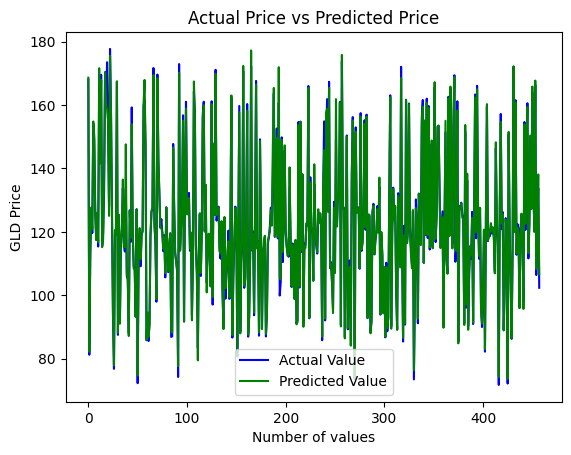

In [29]:
# compare the actual values and predicted values in plot
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
#Lines are plotted on top of each other